# Rigid Body Transformation

Suppose we have a rigid body frame $b$ rotating and translating in a fix world frame $w$, the transformation from $b$ to $w$ is $T^{wb} = T_{trans}T_{rot}$, then we have the following properties:

* $RR^{wb}$ rotates rigid body orientation $R^{wb}$ in $w$ frame
* $R^{wb}R$ rotates rigid body orientation $R^{wb}$ in $b$ frame

* $TT^{wb}$ rotates and translate rigid body pose $T^{wb}$ in $w$ frame
    * $T_{trans}T_{rot}T^{wb}$ rotates and translate rigid body pose $T^{wb}$ in $w$ frame
* $T^{wb}T$ rotates and translate rigid body pose $T^{wb}$ in $b$ frame
    * $T^{wb}T_{trans}T_{rot}$ rotates and translate rigid body pose $T^{wb}$ in $b$ frame


In [ ]:
# k3d plot helper functions

import k3d
import math
import numpy as np
import time


class XYZ_RBG_Axes():
    def __init__(self, plot, name, R, t, color=0xffff00, axis_length = 1):
        self.axis_length = axis_length
        self.plot = plot
        self.R = R
        self.t = t.reshape(3, 1)
        self.name = name
        origin = self.t
        x_axis = np.stack((origin, origin + self.R.dot(np.array([axis_length, 0., 0.])).reshape(3,1)), axis=0)
        y_axis = np.stack((origin, origin + self.R.dot(np.array([0., axis_length, 0.])).reshape(3,1)), axis=0)
        z_axis = np.stack((origin, origin + self.R.dot(np.array([0., 0., axis_length])).reshape(3,1)), axis=0)
        self.xline_plot = k3d.line(x_axis, shader='mesh', width=0.05, color=0xff0000, name=name+'_xaxis')
        self.yline_plot = k3d.line(y_axis, shader='mesh', width=0.05, color=0x0000ff, name=name+'_yaxis')
        self.zline_plot = k3d.line(z_axis, shader='mesh', width=0.05, color=0x00ff00, name=name+'_zaxis')
        self.xpoint = k3d.points(origin + self.R.dot(np.array([axis_length, 0., 0.])).reshape(3,1), point_size=0.3, 
                                  shader='3d', color=color, name=self.name+'_end_point_x')
        self.ypoint = k3d.points(origin + self.R.dot(np.array([0., axis_length, 0.])).reshape(3,1), point_size=0.3, 
                                  shader='3d', color=color, name=self.name+'_end_point_y')
        self.zpoint = k3d.points(origin + self.R.dot(np.array([0., 0., axis_length])).reshape(3,1), point_size=0.3, 
                                  shader='3d', color=color, name=self.name+'_end_point_z')
        self.plot += self.xline_plot
        self.plot += self.yline_plot
        self.plot += self.zline_plot
        self.plot += self.xpoint
        self.plot += self.ypoint
        self.plot += self.zpoint 
    def update_pose(self, R, t):
        self.R = R
        self.t = t.reshape(3,1)
        origin = self.t
        axis_length = self.axis_length
        x_axis = np.stack((origin, origin + self.R.dot(np.array([axis_length, 0., 0.])).reshape(3,1)), axis=0)
        y_axis = np.stack((origin, origin + self.R.dot(np.array([0., axis_length, 0.])).reshape(3,1)), axis=0)
        z_axis = np.stack((origin, origin + self.R.dot(np.array([0., 0., axis_length])).reshape(3,1)), axis=0)
        self.xline_plot.vertices = x_axis
        self.xpoint.positions = origin + self.R.dot(np.array([axis_length, 0., 0.])).reshape(3,1)
        self.yline_plot.vertices = y_axis
        self.ypoint.positions = origin + self.R.dot(np.array([0., axis_length, 0.])).reshape(3,1)
        self.zline_plot.vertices = z_axis
        self.zpoint.positions = origin + self.R.dot(np.array([0., 0., axis_length])).reshape(3,1)


plot = k3d.plot(camera_auto_fit=True, grid=(0, 0, 0, 5, 5, 5))
C0 = XYZ_RBG_Axes(plot, 'C0', np.eye(3), np.zeros((3,1)))
C1 = XYZ_RBG_Axes(plot, 'C1', np.eye(3), np.zeros((3,1)), color=0x00ffff, axis_length=0.5)
C2 = XYZ_RBG_Axes(plot, 'C2', np.eye(3), np.zeros((3,1)), color=0xff00ff, axis_length=0.75)

r = 0 * math.pi / 180
p = 0 * math.pi / 180
y = 90 * math.pi / 180
c = np.cos([r, p, y])
s = np.sin([r, p, y])
R01_rpy = np.array([[1, 0, 0],
                [0, c[0], -s[0]],
                [0, s[0], c[0]]]).dot(
                    np.array([[c[1], 0, s[1]],
                              [0, 1,  0],
                              [-s[1], 0, c[1]]])).dot(
                                  np.array([[c[2], -s[2], 0],
                                            [s[2], c[2], 0],
                                            [0, 0, 1]]))

def to_radian(deg):
    return deg * math.pi / 180

def skew(vector):
    return np.array([[0, -vector[2], vector[1]],
                     [vector[2], 0, -vector[0]],
                     [-vector[1], vector[0], 0]])

# rodrigues formula rotation
def SO3(theta, omega_):
    omega = omega_ / np.linalg.norm(omega_)
    return np.eye(3) + math.sin(theta) * skew(omega) + (1 - math.cos(theta)) * skew(omega).dot(skew(omega))
   

plot.display()

#

In the following example, I will show you how to rotate the frame in $w$ and $b$ to the get same pose.
For rotating in $w$, we first rotate yellow frame at origin around z-axis in w frame 45 degree to get the cyan coordinate. Then we will do 45 degree rotation around y and then around x. Finall we should get a pose $R_{wb^{'}} = R_{roll}R_{pitch}R_{yaw}I$ where $I$ is the identity matrix.
For rotating in $b$, we should get a pose $R_{wb^{''}} = IR_{roll}R_{pitch}R_{yaw}$ where $I$ is the identity matrix.

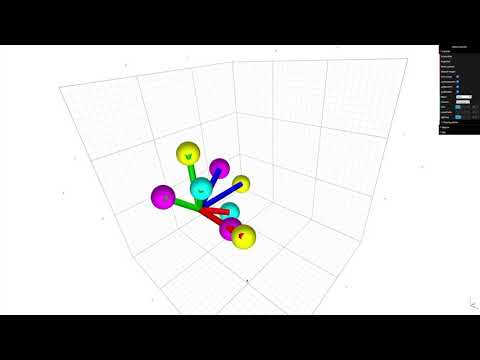

In [55]:
# Display video
from IPython.display import YouTubeVideo
YouTubeVideo('-6K4vX8zhkI', width=500, height=300)
#

In [ ]:
# rotate around z-axis in w -> yaw
theta = to_radian(90.0)
omega = np.array([0, 0, 1])
steps = 100
for i in range(steps):
    R = SO3(theta / steps, omega)
    C1.update_pose(R.dot(C1.R), np.array([0, 0, 0]))
    time.sleep(0.01)
#

In [ ]:
# rotate around y-axis in w -> pitch
time.sleep(1)
theta = to_radian(45.0)
omega = np.array([0, 1, 0])
steps = 100
for i in range(steps):
    R = SO3(theta / steps, omega)
    C1.update_pose(R.dot(C1.R), np.array([0, 0, 0]))
    time.sleep(0.01)   
#

In [ ]:
# rotate around x-axis in w -> roll
time.sleep(1)
theta = to_radian(45.0)
omega = np.array([1, 0, 0])
steps = 100
for i in range(steps):
    R = SO3(theta / steps, omega)
    C1.update_pose(R.dot(C1.R), np.array([0, 0, 0]))
    time.sleep(0.01)
#

In [ ]:
# rotate around x-axis in b -> roll
time.sleep(1)
theta = to_radian(45.0)
omega = np.array([1, 0, 0])
steps = 100
for i in range(steps):
    R = SO3(theta / steps, omega)
    C2.update_pose(C2.R.dot(R), np.array([0, 0, 0]))
    time.sleep(0.01)
#

In [ ]:
# rotate around y-axis in b -> pitch
time.sleep(1)
theta = to_radian(45.0)
omega = np.array([0, 1, 0])
steps = 100
for i in range(steps):
    R = SO3(theta / steps, omega)
    C2.update_pose(C2.R.dot(R), np.array([0, 0, 0]))
    time.sleep(0.01)
#

In [ ]:
# rotate around z-axis in b -> yaw
time.sleep(1)
theta = to_radian(90.0)
omega = np.array([0, 0, 1])
steps = 100
for i in range(steps):
    R = SO3(theta / steps, omega)
    C2.update_pose(C2.R.dot(R), np.array([0, 0, 0]))
    time.sleep(0.01)
#

In [ ]:
# Create new k3d plots to demonstrate both rotation and translation.

plot = k3d.plot(camera_auto_fit=True, grid=(0, 0, 0, 5, 5, 5))
C0 = XYZ_RBG_Axes(plot, 'C0', np.eye(3), np.zeros((3,1)))
C1 = XYZ_RBG_Axes(plot, 'C1', SO3(to_radian(90), np.array([0, 0, 1])), np.array([3, 3, 0]), color=0x00ffff, axis_length=0.5)
C2 = XYZ_RBG_Axes(plot, 'C2', SO3(to_radian(90), np.array([0, 0, 1])), np.array([3, 3, 0]), color=0xff00ff, axis_length=0.75)
plot.display()
#

Now we let's think about both rotation and translation. $TT_{wb}$ rotates $T_{wb}$ in $w$ frame
while $T_{wb}T$ rotates $T_{wb}$ in $b$ frame. As shown in the video below, you won't get the same pose from $TT_{wb} and
T_{wb}T$. Cyan represents rotations in $w$ frame and purple represents rotations in $b$ frame.

How do I animate a rigid body transformation? I actually break $T$ into two parts: $T =
T_{trans}T_{rot}$. $T_{trans}$ is a pure translation and $T_{rot}$ is a pure rotation. So I can animate the rigid body transformation in two steps with a linear velocity and angular velocity separately.

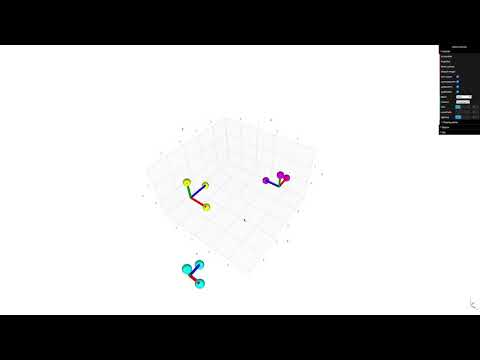

In [56]:
# Display video
from IPython.display import YouTubeVideo
YouTubeVideo('lpMTixuvteY', width=500, height=300)
#

Firstly, we will move the rigid body in $w$ frame, i.e. $T_{wb^{'}} = TT_{wb}$. In this case, we will do $T_{rot}$ first then $T_{trans}$.

In [ ]:
# Move rigid body in w frame
theta = to_radian(-90.0)
omega = np.array([0, 0, 1])
t = np.array([-1, 1, 0]).reshape(3, 1)
expected_R = SO3(theta, omega).dot(C1.R) 
expected_t = SO3(theta, omega).dot(C1.t) + t
steps = 100
time.sleep(2)
for i in range(steps):
    R = SO3(theta / steps, omega)
    C1.update_pose(R.dot(C1.R), R.dot(C1.t))
    time.sleep(0.01)
time.sleep(0.5)
for i in range(steps):
    delta_xyz = t / steps
    C1.update_pose(C1.R, C1.t + delta_xyz.reshape(3,1))
    time.sleep(0.01)
np.set_printoptions(suppress=True)
#print("=== Rotating in w frame ====")
#print("expected_R:\n {}".format(expected_R))
#print("final_R:\n {}".format(C1.R))
#print("expected_t:\n {}".format(expected_t))
#print("final_t:\n {}".format(C1.t))
#

Then, we will move the rigid body in $b$ frame, i.e. $T_{wb^{''}} = T_{wb}T$. In this case, we will do $T_{trans}$ first then $T_{rot}$.

In [ ]:
# Move rigid body in r frame
expected_R = C2.R.dot(SO3(theta, omega))
expected_t = C2.R.dot(t) + C2.t
time.sleep(2)
for i in range(steps):
    delta_xyz = t / steps
    C2.update_pose(C2.R, C2.t + C2.R.dot(delta_xyz.reshape(3,1)))
    time.sleep(0.01)
time.sleep(0.5)
for i in range(steps):
    R = SO3(theta / steps, omega)
    C2.update_pose(C2.R.dot(R), C2.t)
    time.sleep(0.01)
np.set_printoptions(suppress=True)
#print("=== Rotating in b frame ====")
#print("expected_R:\n {}".format(expected_R))
#print("final_R:\n {}".format(C2.R))
#print("expected_t:\n {}".format(expected_t))
#print("final_t:\n {}".format(C2.t))
#

Now think about what angle axis $\omega$, rotation angle $\theta$, and translation $t$ can bring $T_{wb}$ back to $I$. Of course, you can inverse the transformation matrix. But if you understand how rotating in body frame, you can easily figure this out by first find translation vector and then rotation components. 

In [ ]:
# Move rigid body back to origin

plot = k3d.plot(camera_auto_fit=True, grid=(0, 0, 0, 5, 5, 5))
C0 = XYZ_RBG_Axes(plot, 'C0', np.eye(3), np.zeros((3,1)))
C1 = XYZ_RBG_Axes(plot, 'C1', SO3(to_radian(90), np.array([0, 0, 1])), np.array([3, 3, 0]), color=0x00ffff, axis_length=0.5)
C2 = XYZ_RBG_Axes(plot, 'C2', SO3(to_radian(90), np.array([0, 0, 1])), np.array([3, 3, 0]), color=0xff00ff, axis_length=0.75)
plot.display()
theta = to_radian(-90.0)
omega = np.array([0, 0, 1])
t = np.array([-3, 3, 0]).reshape(3, 1)

# Rotating in body frame
expected_R = C2.R.dot(SO3(theta, omega))
expected_t = C2.R.dot(t) + C2.t
time.sleep(2)
for i in range(steps):
    delta_xyz = t / steps
    C2.update_pose(C2.R, C2.t + C2.R.dot(delta_xyz.reshape(3,1)))
    time.sleep(0.01)
time.sleep(0.5)
for i in range(steps):
    R = SO3(theta / steps, omega)
    C2.update_pose(C2.R.dot(R), C2.t)
    time.sleep(0.01)
np.set_printoptions(suppress=True)
#print("=== Rotating in b frame ====")
#print("expected_R:\n {}".format(expected_R))
#print("final_R:\n {}".format(C2.R))
#print("expected_t:\n {}".format(expected_t))
#print("final_t:\n {}".format(C2.t))
#

But can you animate it with a velocity containing both linear velocity and angular velocity? This was a new thing I learned which is called Twist. Like angular velocity can be represented by a $3x1$ vector, twist can be represented by a 6x1 vector. In the video below, I first show how to move the purple frame back to origin by translating and rotating in its $b$ frame in two steps. Then I show an animation moving cyan frame back to origin smoothly with a combined linear and angular velocity.

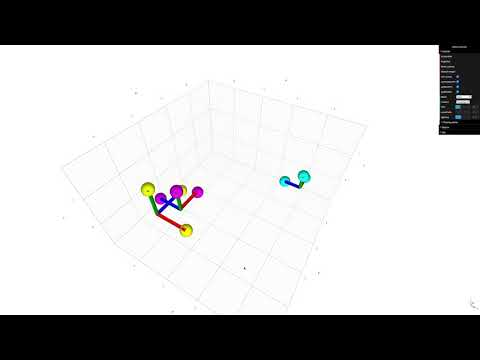

In [58]:
# Display video
from IPython.display import YouTubeVideo
YouTubeVideo('lcZtD6v0hNs', width=500, height=300)
#

In [ ]:
# Twist demonstration.
def SE3(twist_theta, twist_omega_, twist_v):
    T = np.eye(4)
    twist_omega = twist_omega_ / np.linalg.norm(twist_omega_)
    T[0:3, 0:3] = SO3(twist_theta, twist_omega)
    T[0:3, [3]] = (
                np.eye(3)*twist_theta 
                + (1-math.cos(twist_theta))*skew(twist_omega) 
                + (twist_theta-math.sin(twist_theta))*skew(twist_omega).dot(skew(twist_omega))
                ).dot(twist_v).reshape(3,1)
    return T

def TwistV(t, twist_theta, twist_omega_):
    twist_omega = twist_omega_ / np.linalg.norm(twist_omega_)
    return np.linalg.inv(np.eye(3)*twist_theta 
                        + (1-math.cos(twist_theta))*skew(twist_omega) 
                        + (twist_theta-math.sin(twist_theta))*skew(twist_omega).dot(skew(twist_omega))
                        ).dot(t).reshape(3,1)

expected_R = SO3(theta, omega).dot(C1.R) 
expected_t = SO3(theta, omega).dot(C1.t) + t
C1_R = C1.R
C1_t = C1.t
twist_v = TwistV(t, theta, omega)
steps = 100
time.sleep(2)
for i in range(steps):
    T = SE3((i+1) * theta / steps, omega, twist_v)
    C1.update_pose(T[0:3, 0:3].dot(C1_R), T[0:3, 0:3].dot(C1_t)+T[0:3, [3]])
    time.sleep(0.01)

np.set_printoptions(suppress=True)
#print("=== Rotating in w frame ====")
#print("expected_R:\n {}".format(expected_R))
#print("final_R:\n {}".format(C1.R))
#print("expected_t:\n {}".format(expected_t))
#print("final_t:\n {}".format(C1.t))
#

# Time Derivative of Rotation Matrices 

We have a rotation matrix $R^{wb}$ and we are interested to know the time derivative of it as $\dot{R^{wb}}$. The rotation matrix has 9 elements, however we know that the degree of freedom of the angular velocity is 3 which can be represented as a magnitude value $\theta$ and a normalized direction vector $\omega$. Then the question is how do we get $\dot{R^{wb}}$?

Firstly, we specify the rotation vector $\omega_b$ in the body frame. Then in the body frame $b$, for each axis we can get $\dot{v} = [\omega_b]_\times v$. Put them into a matrix form, we can get 
$$
\begin{align}
\dot{I_b} = [\omega_b]_\times 
\begin{bmatrix} 
1, &0, &0 \\
0, &1, &0 \\
0, &0, &1
\end{bmatrix}
\end{align}
$$


The math notation might be very rigorous here, but the main idea is that each column is the linear velocity of an axis. If we integrate over time, we can get $R^{bb'} = \int{\dot{I_b(t)}}dt = \int{[\omega_b]_\times}dt$, then the new rotation matrix in the world frame will be $R^{wb'} = R^{wb}R^{bb'} = \int{\dot{R^{wb}}}dt$. 

Then we found $\dot{R_{wb}} = R_{wb}[\omega_b]_\times$. 

## Summary

In this blog, I emphasize only on using $\omega_b$ because it can be measured by IMU in its body frame. 

$$
\begin{align}
\dot{R_{wb}} &= R_{wb}[\omega_b]_\times \\
\dot{R_{bw}} &= -[\omega_b]_\times R_{bw}
\end{align}
$$